### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

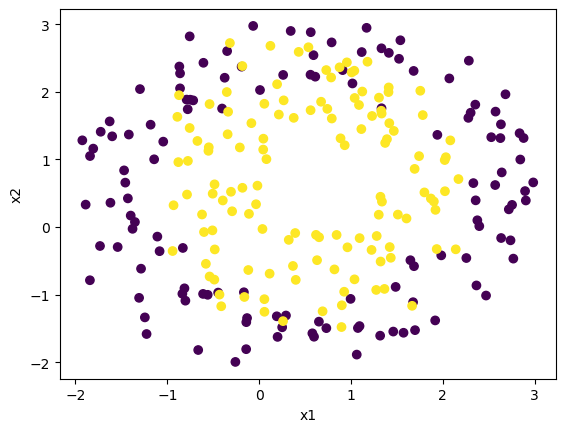

In [2]:
# Load dataset
df = pd.read_csv('q3_data.csv', header=None)
x = df.iloc[:,:2].to_numpy()
y = df.iloc[:,-1].to_numpy()

# Plot points
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [3]:
# Transform points to 28D space
def map_feature(X):
    aug = []
    for data in X:
        feature=[1]
        for i in range(1,7):
            for j in range(0,i+1):
                feature.append((data[0]**j) * (data[1]**(i-j)))
        aug.append(feature)
    return np.transpose(aug)

## P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

In [4]:
X = map_feature(x)

In [5]:
X.shape

(28, 252)

In [6]:
# Define your functions here

# Pass in the required arguments
# Implement the sigmoid function
def sigmoid(weights, X):
    e = np.dot(weights, X)
    sig = 1 / (1 + np.exp(-e))
    return sig

# Pass in the required arguments
# The function should return the gradients
def calculate_gradients(pred, X, Y, weights, reg):
    grads = np.array(np.mean((pred - Y) * X[0,:]))
    for i in range(1, X.shape[0]):
        grads = np.append(grads,np.mean((pred - Y) * X[i,:]) + reg * weights[i] / X.shape[1])
    return grads

# Update the weights using gradients calculated using above function and learning rate
# The function should return the updated weights to be used in the next step
def update_weights(prev_weights, current_grads, learning_rate):
    
    for i in range(len(prev_weights)):
        prev_weights[i] = prev_weights[i] - learning_rate*current_grads[i]
    return prev_weights

# Use the implemented functions in the main function
# 'main' function should return weights after all the iterations
# Dont forget to divide by the number of datapoints wherever necessary!
# Initialize the intial weights randomly

def main(X, Y, learning_rate = 0.00005, num_steps = 50000, reg = 1):
    weights = np.zeros(28)

    
    for i in range(num_steps):
        sig = sigmoid(weights, X)
        grads = calculate_gradients(sig, X, Y, weights, reg)
        weights = update_weights(weights, grads, learning_rate)
    sig = sigmoid(weights, X)
    grads = calculate_gradients(sig, X, Y, weights, reg)
    weights = update_weights(weights, grads, learning_rate)
    return weights

# Pass in the required arguments (final weights and input)
# The function should return the predictions obtained using sigmoid function.
def predict(weights, X):
    Y_hat = sigmoid(weights, X)
    return Y_hat # np.where(Y_hat > 0.5, 1, 0)


# Plot decision boundary

In [7]:
weights = main(X,y)

In [8]:
print("Final weights are:\n",weights)

Final weights are:
 [ 0.21006022  0.06950377  0.10119934  0.06790672  0.00730979  0.09657131
  0.06996385  0.06685955  0.06128291  0.18470807 -0.04490942  0.04799657
  0.02092143  0.05679367  0.08581837  0.08843819  0.06268453  0.03550517
  0.05999456  0.05394752  0.24501007 -0.03291173 -0.02275976 -0.10666548
  0.03102841 -0.11417006  0.00078319 -0.15749374]


In [9]:
final_prediction = predict(weights, X)

In [10]:
np.where(final_prediction > 0.5, 1, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [11]:
xx, yy = np.meshgrid(np.linspace(x[:,0].min(), x[:,0].max(), num=200),
                         np.linspace(x[:,1].min(), x[:,1].max(), num=200))
Z = predict(weights, map_feature(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)


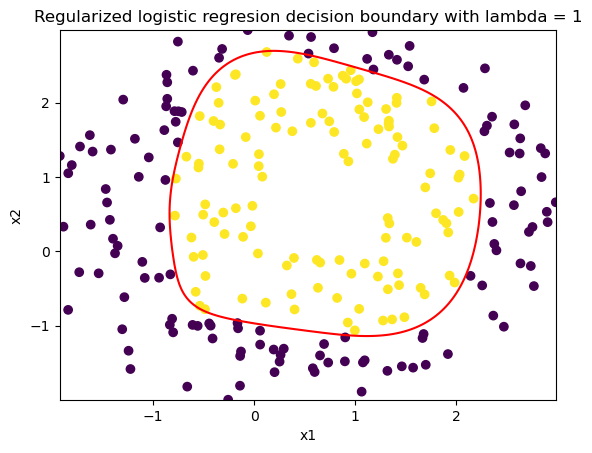

In [12]:
plt.scatter(x[:,0], x[:,1], c=np.where(final_prediction > 0.5, 1, 0))
plt.contour(xx, yy, Z, levels = [0.5], colors='red')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Regularized logistic regresion decision boundary with lambda = 1")
plt.show()

## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100, 10000]$
- draw the decision boundaries


In [13]:
# lambda = 0
final_weights_0 = main(X,y, reg = 0)
pred_0 = predict(final_weights_0, X)

# lambda = 1
final_weights_1 = main(X,y, reg = 1)
pred_1 = predict(final_weights_1, X)

# lambda = 100
final_weights_100 = main(X,y, reg = 100)
pred_100 = predict(final_weights_100, X)

# lambda = 10000
final_weights_10000 = main(X,y, reg = 10000)
pred_10000 = predict(final_weights_10000, X)


In [14]:
xx, yy = np.meshgrid(np.linspace(x[:,0].min(), x[:,0].max(), num=200),
                         np.linspace(x[:,1].min(), x[:,1].max(), num=200))
Z0 = predict(final_weights_0, map_feature(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
Z1 = predict(final_weights_1, map_feature(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
Z100 = predict(final_weights_100, map_feature(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
Z10000 = predict(final_weights_10000, map_feature(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)


Text(0.5, 1.0, 'lambda = 10000')

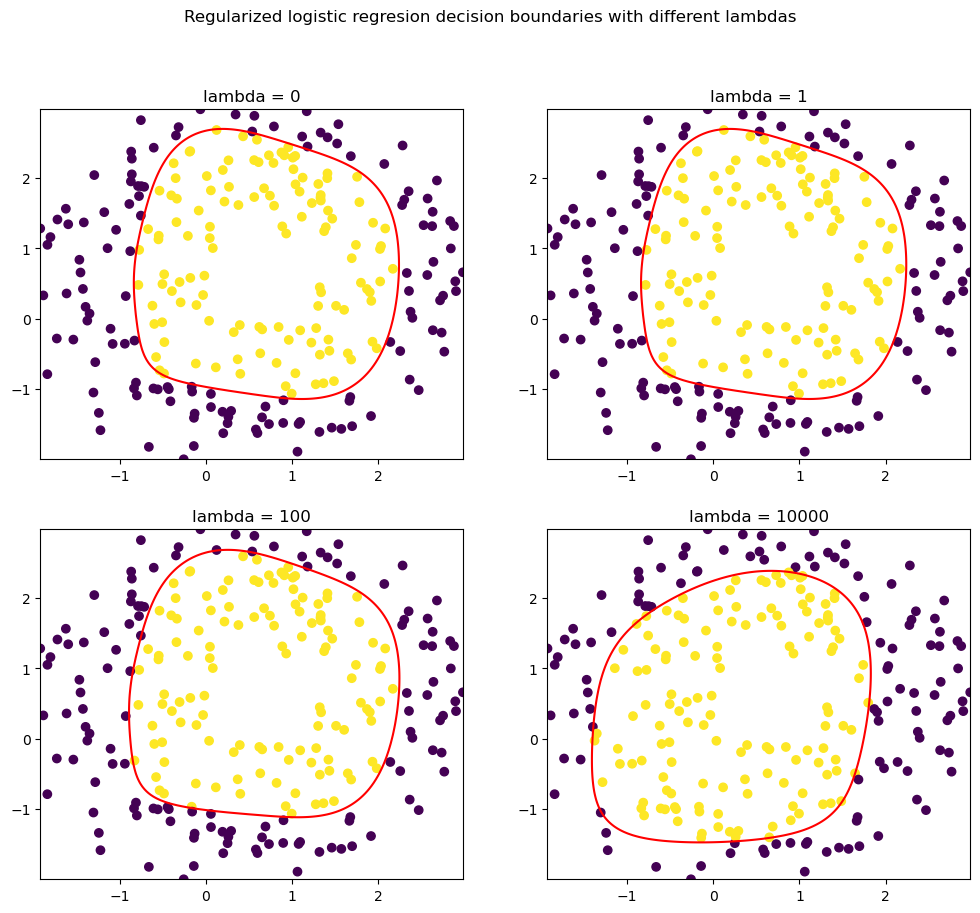

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle("Regularized logistic regresion decision boundaries with different lambdas")
axs[0, 0].scatter(x[:,0], x[:,1], c=np.where(pred_0 > 0.5, 1, 0))
axs[0, 0].contour(xx, yy, Z0, 1, levels=[0.5], colors='red')
axs[0, 0].set_title("lambda = 0")
axs[0, 1].scatter(x[:,0], x[:,1], c=np.where(pred_1 > 0.5, 1, 0))
axs[0, 1].contour(xx, yy, Z1, 1, levels=[0.5], colors='red')
axs[0, 1].set_title("lambda = 1")
axs[1, 0].scatter(x[:,0], x[:,1], c=np.where(pred_100 > 0.5, 1, 0))
axs[1, 0].contour(xx, yy, Z100, 1, levels=[0.5], colors='red')
axs[1, 0].set_title("lambda = 100")
axs[1, 1].scatter(x[:,0], x[:,1], c=np.where(pred_10000 > 0.5, 1, 0))
axs[1, 1].contour(xx, yy, Z10000, levels=[0.5], colors='red')
axs[1, 1].set_title("lambda = 10000")


Answer for part (d) here: 

Increasing the lambda hyper-parameter seems to let the decision boundary grow, meaning that it gets larger and encompasses more of the data. This happens because, by increasing lambda we are increasing the regularization, setting a tighter constraint for the gradients during training. This regularization reduces overfitting which is why the resulting decision boundary is larger and with a lower variance.